In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from collections import Counter
import re
import nltk

In [2]:
# Install wordcloud if not already installed
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from collections import Counter
import re

# Download necessary NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
try:
    df = pd.read_csv('path/to/your/dataset.csv', sep='\t', names=['label', 'message'], encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('path/to/your/dataset.csv', sep='\t', names=['label', 'message'], encoding='latin1')

# Convert all values in the 'message' column to strings
df['message'] = df['message'].astype(str)

# Preprocess text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove email addresses, URLs, and HTML tags
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    
    # Convert to lower case
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords, punctuation, and numbers, then lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    
    return tokens

df['tokens'] = df['message'].apply(preprocess_text)

# EDA
def get_most_frequent_ngrams(corpus, n=None):
    flat_corpus = [item for sublist in corpus for item in sublist]
    n_grams = ngrams(flat_corpus, n)
    return Counter(n_grams).most_common(10)

spam_tokens = df[df['label'] == 'spam']['tokens']
ham_tokens = df[df['label'] == 'ham']['tokens']

# Most frequent words
spam_words = get_most_frequent_ngrams(spam_tokens, 1)
ham_words = get_most_frequent_ngrams(ham_tokens, 1)
print("Spam words:", spam_words)
print("Ham words:", ham_words)

# Most frequent bigrams
spam_bigrams = get_most_frequent_ngrams(spam_tokens, 2)
ham_bigrams = get_most_frequent_ngrams(ham_tokens, 2)
print("Spam bigrams:", spam_bigrams)
print("Ham bigrams:", ham_bigrams)

# Most frequent trigrams
spam_trigrams = get_most_frequent_ngrams(spam_tokens, 3)
ham_trigrams = get_most_frequent_ngrams(ham_tokens, 3)
print("Spam trigrams:", spam_trigrams)
print("Ham trigrams:", ham_trigrams)

# Wordcloud
def generate_wordcloud(tokens, title):
    text = ' '.join([' '.join(tokens) for tokens in tokens])
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(spam_tokens, 'Spam Wordcloud')
generate_wordcloud(ham_tokens, 'Ham Wordcloud')

# Convert the text to vectors using Bag-of-Words and Tf-IDF
vectorizer_bow = CountVectorizer(stop_words='english')
X_bow = vectorizer_bow.fit_transform(df['message'])

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['message'])

# Convert preprocessed tokens back to text for Tf-IDF with text preprocessing
df['cleaned_message'] = df['tokens'].apply(lambda x: ' '.join(x))
X_tfidf_preprocessed = tfidf_vectorizer.fit_transform(df['cleaned_message'])

# Machine learning model
y = df['label'].map({'ham': 0, 'spam': 1})

X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_tfidf_preprocessed, X_test_tfidf_preprocessed, _, _ = train_test_split(X_tfidf_preprocessed, y, test_size=0.2, random_state=42)

model = LogisticRegression()

# Bag-of-Words
model.fit(X_train_bow, y_train)
y_pred_bow = model.predict(X_test_bow)
f1_bow = f1_score(y_test, y_pred_bow)
print("F1 Score with Bag-of-Words:", f1_bow)

# TF-IDF
model.fit(X_train_tfidf, y_train)
y_pred_tfidf = model.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf)
print("F1 Score with TF-IDF:", f1_tfidf)

# TF-IDF with Text Preprocessing
model.fit(X_train_tfidf_preprocessed, y_train)
y_pred_tfidf_preprocessed = model.predict(X_test_tfidf_preprocessed)
f1_tfidf_preprocessed = f1_score(y_test, y_pred_tfidf_preprocessed)
print("F1 Score with TF-IDF (with text preprocessing):", f1_tfidf_preprocessed)

# List all scores
print("\nF1 Scores of Different Methods:")
print(f"Bag-of-Words: {f1_bow}")
print(f"TF-IDF: {f1_tfidf}")
print(f"TF-IDF with text preprocessing: {f1_tfidf_preprocessed}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<WordListCorpusReader in 'C:\\Users\\akash\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [4]:
df = pd.read_csv('spam.csv', delimiter=',', encoding='latin1', header=None, names=['label', 'message'], usecols=[0, 1])

In [5]:
df['message'] = df['message'].astype(str)

In [6]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [7]:
def preprocess_text(text):
    # Remove email addresses, URLs, and HTML tags
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    
    # Convert to lower case
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords, punctuation, and numbers, then lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    
    return tokens

In [8]:
df['tokens'] = df['message'].apply(preprocess_text)

In [9]:
df

,label,message,tokens
0,v1,v2,[]
1,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
2,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
4,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,"[time, tried, contact, u, pound, prize, claim,..."
5569,ham,Will Ì_ b going to esplanade fr home?,"[b, going, esplanade, fr, home]"
5570,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, suggestion]"
5571,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, interested, buyin..."


In [10]:
def get_most_frequent_ngrams(corpus, n=None):
    flat_corpus = [item for sublist in corpus for item in sublist]
    n_grams = ngrams(flat_corpus, n)
    return Counter(n_grams).most_common(10)

In [11]:
spam_tokens = df[df['label'] == 'spam']['tokens']
ham_tokens = df[df['label'] == 'ham']['tokens']

In [12]:
spam_words = get_most_frequent_ngrams(spam_tokens, 1)
ham_words = get_most_frequent_ngrams(ham_tokens, 1)
print("Spam words:", spam_words)
print("Ham words:", ham_words)

Spam words: [(('call',), 358), (('free',), 219), (('txt',), 156), (('u',), 149), (('ur',), 144), (('text',), 138), (('mobile',), 135), (('claim',), 115), (('stop',), 114), (('reply',), 105)]
Ham words: [(('u',), 1035), (('gt',), 318), (('lt',), 316), (('get',), 312), (('go',), 275), (('ok',), 245), (('know',), 245), (('call',), 245), (('come',), 245), (('got',), 242)]


BIGRAMS

In [13]:
spam_bigrams = get_most_frequent_ngrams(spam_tokens, 2)
ham_bigrams = get_most_frequent_ngrams(ham_tokens, 2)
print("Spam bigrams:", spam_bigrams)
print("Ham bigrams:", ham_bigrams)

Spam bigrams: [(('please', 'call'), 45), (('customer', 'service'), 27), (('po', 'box'), 24), (('guaranteed', 'call'), 23), (('prize', 'guaranteed'), 22), (('call', 'landline'), 22), (('chance', 'win'), 19), (('selected', 'receive'), 19), (('send', 'stop'), 19), (('free', 'text'), 19)]
Ham bigrams: [(('lt', 'gt'), 276), (('gon', 'na'), 58), (('call', 'later'), 52), (('let', 'know'), 41), (('sorry', 'call'), 38), (('r', 'u'), 37), (('u', 'r'), 35), (('take', 'care'), 33), (('good', 'morning'), 32), (('new', 'year'), 30)]


TRIGRAMS

In [14]:
spam_trigrams = get_most_frequent_ngrams(spam_tokens, 3)
ham_trigrams = get_most_frequent_ngrams(ham_tokens, 3)
print("Spam trigrams:", spam_trigrams)
print("Ham trigrams:", ham_trigrams)

Spam trigrams: [(('prize', 'guaranteed', 'call'), 21), (('call', 'land', 'line'), 18), (('private', 'account', 'statement'), 16), (('call', 'customer', 'service'), 15), (('call', 'identifier', 'code'), 15), (('guaranteed', 'call', 'land'), 15), (('account', 'statement', 'show'), 14), (('identifier', 'code', 'expires'), 14), (('land', 'line', 'claim'), 14), (('draw', 'show', 'prize'), 13)]
Ham trigrams: [(('sorry', 'call', 'later'), 38), (('lt', 'decimal', 'gt'), 23), (('lt', 'gt', 'min'), 19), (('happy', 'new', 'year'), 19), (('gt', 'lt', 'gt'), 18), (('lt', 'gt', 'lt'), 16), (('like', 'lt', 'gt'), 14), (('pls', 'send', 'message'), 13), (('cant', 'pick', 'phone'), 12), (('pick', 'phone', 'right'), 12)]


In [15]:
def generate_wordcloud(tokens, title):
    text = ' '.join([' '.join(tokens) for tokens in tokens])
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

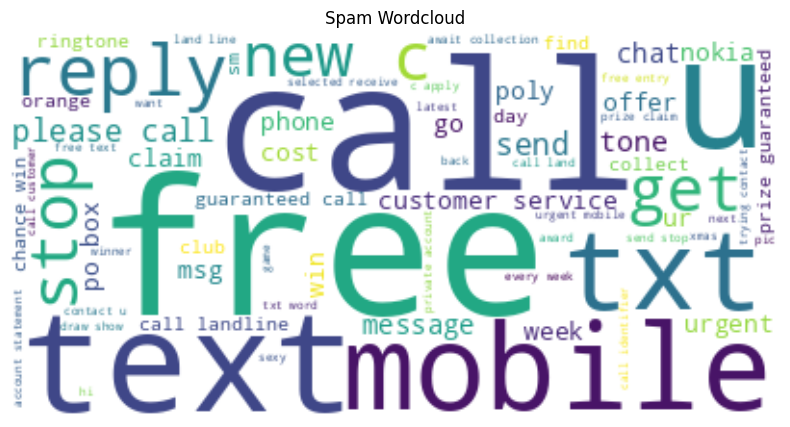

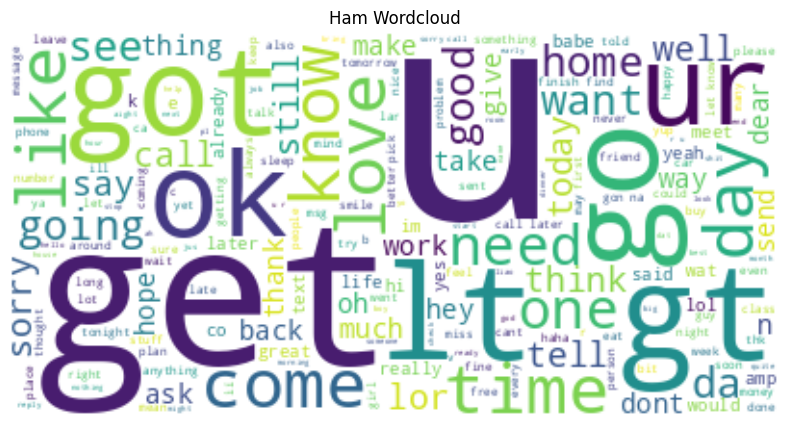

In [16]:
generate_wordcloud(spam_tokens, 'Spam Wordcloud')
generate_wordcloud(ham_tokens, 'Ham Wordcloud')

In [17]:
vectorizer_bow = CountVectorizer(stop_words='english')
X_bow = vectorizer_bow.fit_transform(df['message'])

In [18]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['message'])

In [19]:
df['cleaned_message'] = df['tokens'].apply(lambda x: ' '.join(x))
X_tfidf_preprocessed = tfidf_vectorizer.fit_transform(df['cleaned_message'])

In [20]:
feature_names_bow = vectorizer_bow.get_feature_names_out()
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

In [21]:
print("Feature names (Bag-of-Words):")
print(feature_names_bow)

print("\nFeature names (TF-IDF):")
print(feature_names_tfidf)

Feature names (Bag-of-Words):
['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']

Feature names (TF-IDF):
['aa' 'aah' 'aaniye' ... 'åôrents' 'ìä' 'ìï']


In [30]:
df['cleaned_message'] = df['tokens'].apply(lambda x: ' '.join(x))
X_tfidf_preprocessed = tfidf_vectorizer.fit_transform(df['cleaned_message'])

In [34]:
y = df['label'].map({'ham': 0, 'spam': 1}).fillna(0)

In [35]:
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_tfidf_preprocessed, X_test_tfidf_preprocessed, _, _ = train_test_split(X_tfidf_preprocessed, y, test_size=0.2, random_state=42)

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train_bow, y_train)
y_pred_bow = model.predict(X_test_bow)
f1_bow = f1_score(y_test, y_pred_bow)
print("F1 Score with Bag-of-Words:", f1_bow)

F1 Score with Bag-of-Words: 0.9214285714285714


In [38]:
model.fit(X_train_tfidf, y_train)
y_pred_tfidf = model.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf)
print("F1 Score with TF-IDF:", f1_tfidf)

F1 Score with TF-IDF: 0.7826086956521738


In [39]:
model.fit(X_train_tfidf_preprocessed, y_train)
y_pred_tfidf_preprocessed = model.predict(X_test_tfidf_preprocessed)
f1_tfidf_preprocessed = f1_score(y_test, y_pred_tfidf_preprocessed)
print("F1 Score with TF-IDF (with text preprocessing):", f1_tfidf_preprocessed)


F1 Score with TF-IDF (with text preprocessing): 0.8108108108108109


In [40]:
print("\nF1 Scores of Different Methods:")
print(f"Bag-of-Words: {f1_bow}")
print(f"TF-IDF: {f1_tfidf}")
print(f"TF-IDF with text preprocessing: {f1_tfidf_preprocessed}")


F1 Scores of Different Methods:
Bag-of-Words: 0.9214285714285714
TF-IDF: 0.7826086956521738
TF-IDF with text preprocessing: 0.8108108108108109


In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('spam.csv', delimiter=',', encoding='latin1', header=None, names=['label', 'message'], usecols=[0, 1])

# Drop rows with missing values
df.dropna(inplace=True)

# Convert all values in the 'message' column to strings
df['message'] = df['message'].astype(str)

# Define your custom stop words list
custom_stop_words = ['almost', 'between', 'been', 'before', 'whose', 'last', 'besides', 'ca', 'former', 'which', 'whereafter', 'behind', 
              'one', 'much', 'ours', 'really', 'none', 'than', 'him', 'go', 'an', 'off', 'moreover', 'already', 'most', 
              'across', 'has', 'mine', 'over', 'latter', 'mostly', 'thereupon', 'even', 'very', 'only', 'above', 'within', 'own', 
              'hence', 'third', 'few', 'someone', 'nobody', 'my', 'amongst', 'formerly', 'seem', 'yet', 'when', 'name', 
              'throughout', 'further', 'me', 'put', 'see', 'against', 'thru', 'could', 'nowhere', 'rather', 'for', 'there', 'of', 
              'by', 'eight', 'becomes', 'herein', 'will', 'during', 'since', 'from', 'into', 'toward', 'made', 'at', 'with', 
              'who', 'thus', 'well', 'somehow', 'always', 'beforehand', 'yourself', 'we', 'again', 'bottom', 
              'just', 'after', 'various', 'other', 'anyone', 'around', 'on', 'afterwards', 'hers', 'everyone', 'although', 
              'three', 'anyway', 'because', 'nine', 'anywhere', 'latterly', 'twenty', 'often', 'here', 'eleven',  
              'alone', 'therefore', 'otherwise', 'something', 'next', 'using', 'less', 'therein', 'itself', 'too', 'hereafter', 
              'this', 'what', 'whereupon', 'beside', 'every', 'move', 'whereas', 'full', 'whether', 'hereby', 
              'in', 'do', 'once', 'used', 'due', 'their', 'whenever', 'top', 'fifty', 'had', 'were', 'among', 'under', 
              'the', 'how', 'serious', 'whom', 'her', 'he', 'except', 'yourselves', 'empty', 'make', 'became', 'same', 
              'call', 'thence', 'enough', 'any', 'anyhow', 'below', 'your', 'per', 'sometimes', 'fifteen', 'sixty', 'another', 'a', 
              'his', 'say', 'also', 'must', 'elsewhere', 'as', 'anything', 'it', 'so', 'regarding', 'beyond', 'myself', 
              'themselves', 'if', 'down', 'yours', 'that', 'have', 'becoming', 're', 'many', 'become', 'sometime', 'more', 'back', 
              'forty', 'herself', 'did', 'perhaps', 'others', 'himself', 'wherein', 'namely', 'ever', 'give', 
              'wherever', 'out', 'seems', 'onto', 'hereupon', 'seeming', 'might', 'everywhere', 'they', 'else', 'thereafter', 'where', 
              'she', 'can', 'least', 'was', 'and', 'why', 'is', 'towards', 'whither', 'two', 'through', 'everything', 
              'some', 'whence', 'part', 'four', 'side', 'such', 'twelve', 'still', 'take', 'these', 'done', 'those', 'however', 'ten', 
              'are', 'amount', 'up', 'being', 'keep', 'while', 'doing', 'front', 'about', 'but', 'though', 
              'you', "'re", 'indeed', 'five', 'them', 'please', 'would', 'whatever', 'whole', 'either', 'seemed', 
              'show', 'our', 'somewhere', 'now', 'together', 'each', 'then', 'six', 'until', 'without', 'upon', 'am', 'along', 
              'be', 'all', 'both', 'or', 'whereby', 'whoever', 'get', 'its', 'hundred', 
              'should', 'may', 'meanwhile', 'first', 'does', 'quite', 'i', 'thereby', 'ourselves', 'to', 'unless', 'via', 'us', 'several']

# Preprocess text
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove email addresses, URLs, and HTML tags
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    
    # Convert to lower case
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove custom stopwords, punctuation, and numbers, then lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in custom_stop_words]
    
    return tokens

df['tokens'] = df['message'].apply(preprocess_text)

# Convert the text to vectors using Bag-of-Words and Tf-IDF
vectorizer_bow = CountVectorizer(stop_words=custom_stop_words)
X_bow = vectorizer_bow.fit_transform(df['message'])

tfidf_vectorizer = TfidfVectorizer(stop_words=custom_stop_words)
X_tfidf = tfidf_vectorizer.fit_transform(df['message'])

# Retrieve feature names after fitting
feature_names_bow = vectorizer_bow.get_feature_names_out()
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

# Display feature names
print("Feature names (Bag-of-Words):")
print(feature_names_bow)

print("\nFeature names (TF-IDF):")
print(feature_names_tfidf)

# Convert preprocessed tokens back to text for Tf-IDF with text preprocessing
df['cleaned_message'] = df['tokens'].apply(lambda x: ' '.join(x))
X_tfidf_preprocessed = tfidf_vectorizer.fit_transform(df['cleaned_message'])

# Machine learning model
y = df['label'].map({'ham': 0, 'spam': 1}).fillna(0)

X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_tfidf_preprocessed, X_test_tfidf_preprocessed, _, _ = train_test_split(X_tfidf_preprocessed, y, test_size=0.2, random_state=42)

model = LogisticRegression()

# Bag-of-Words
model.fit(X_train_bow, y_train)
y_pred_bow = model.predict(X_test_bow)
f1_bow = f1_score(y_test, y_pred_bow)
print("F1 Score with Bag-of-Words:", f1_bow)

# TF-IDF
model.fit(X_train_tfidf, y_train)
y_pred_tfidf = model.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf)
print("F1 Score with TF-IDF:", f1_tfidf)

# TF-IDF with Text Preprocessing
model.fit(X_train_tfidf_preprocessed, y_train)
y_pred_tfidf_preprocessed = model.predict(X_test_tfidf_preprocessed)
f1_tfidf_preprocessed = f1_score(y_test, y_pred_tfidf_preprocessed)
print("F1 Score with TF-IDF (with text preprocessing):", f1_tfidf_preprocessed)

# List all scores
print("\nF1 Scores of Different Methods:")
print(f"Bag-of-Words: {f1_bow}")
print(f"TF-IDF: {f1_tfidf}")
print(f"TF-IDF with text preprocessing: {f1_tfidf_preprocessed}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Feature names (Bag-of-Words):
['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']

Feature names (TF-IDF):
['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']
F1 Score with Bag-of-Words: 0.9214285714285714
F1 Score with TF-IDF: 0.7777777777777778
F1 Score with TF-IDF (with text preprocessing): 0.8108108108108109

F1 Scores of Different Methods:
Bag-of-Words: 0.9214285714285714
TF-IDF: 0.7777777777777778
TF-IDF with text preprocessing: 0.8108108108108109


In [46]:
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('spam.csv', delimiter=',', encoding='latin1', header=None, names=['label', 'message'], usecols=[0, 1])

# Drop rows with missing values
df.dropna(inplace=True)

# Define your custom stop words list
custom_stop_words = set(stopwords.words('english'))

# Preprocess text
def preprocess_text(text):
    # Remove email addresses, URLs, and HTML tags
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    
    # Convert to lower case
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords, punctuation, and numbers
    tokens = [word for word in tokens if word.isalpha() and word not in custom_stop_words]
    
    return tokens

df['tokens'] = df['message'].apply(preprocess_text)

# Helper function to get the most frequent n-grams
def get_most_frequent_ngrams(tokens_list, n, top_n=10):
    ngrams_list = [ngrams(tokens, n) for tokens in tokens_list]
    flat_ngrams = [item for sublist in ngrams_list for item in sublist]
    ngrams_freq = Counter(flat_ngrams)
    return ngrams_freq.most_common(top_n)

# Separate tokens by class
spam_tokens = df[df['label'] == 'spam']['tokens']
ham_tokens = df[df['label'] == 'ham']['tokens']

# Most frequent words
spam_words = Counter([word for tokens in spam_tokens for word in tokens])
ham_words = Counter([word for tokens in ham_tokens for word in tokens])
print("Most frequent words in spam:")
print(spam_words.most_common(10))
print("\nMost frequent words in ham:")
print(ham_words.most_common(10))

# Most frequent bigrams
spam_bigrams = get_most_frequent_ngrams(spam_tokens, 2)
ham_bigrams = get_most_frequent_ngrams(ham_tokens, 2)
print("\nMost frequent bigrams in spam:")
print(spam_bigrams)
print("\nMost frequent bigrams in ham:")
print(ham_bigrams)

# Most frequent trigrams
spam_trigrams = get_most_frequent_ngrams(spam_tokens, 3)
ham_trigrams = get_most_frequent_ngrams(ham_tokens, 3)
print("\nMost frequent trigrams in spam:")
print(spam_trigrams)
print("\nMost frequent trigrams in ham:")
print(ham_trigrams)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most frequent words in spam:
[('call', 346), ('free', 219), ('txt', 156), ('ur', 144), ('u', 141), ('mobile', 123), ('text', 121), ('stop', 114), ('claim', 113), ('reply', 104)]

Most frequent words in ham:
[('u', 979), ('gt', 318), ('lt', 316), ('get', 301), ('go', 248), ('ok', 245), ('got', 242), ('ur', 237), ('know', 236), ('like', 231)]

Most frequent bigrams in spam:
[(('please', 'call'), 45), (('po', 'box'), 24), (('guaranteed', 'call'), 23), (('prize', 'guaranteed'), 22), (('call', 'landline'), 22), (('selected', 'receive'), 19), (('send', 'stop'), 19), (('every', 'week'), 19), (('await', 'collection'), 19), (('call', 'claim'), 18)]

Most frequent bigrams in ham:
[(('lt', 'gt'), 276), (('gon', 'na'), 58), (('call', 'later'), 50), (('let', 'know'), 39), (('sorry', 'call'), 38), (('r', 'u'), 37), (('u', 'r'), 35), (('good', 'morning'), 31), (('take', 'care'), 31), (('u', 'wan'), 29)]

Most frequent trigrams in spam:
[(('prize', 'guaranteed', 'call'), 21), (('call', 'land', 'line')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


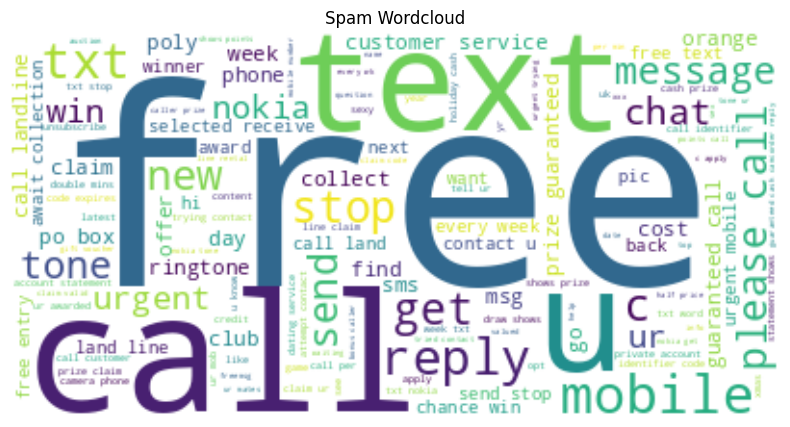

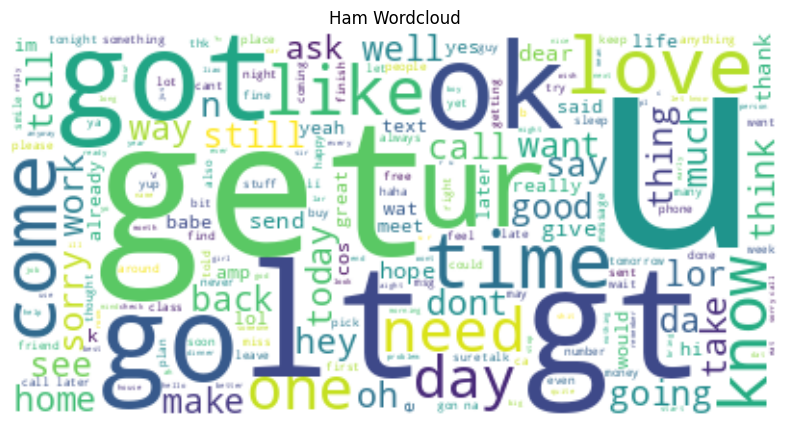

Feature names (Bag-of-Words):
['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']

Feature names (TF-IDF):
['aa' 'aah' 'aaniye' ... 'åôrents' 'ìä' 'ìï']
F1 Score with Bag-of-Words: 0.9214285714285714
F1 Score with TF-IDF: 0.7826086956521738
F1 Score with TF-IDF (with text preprocessing): 0.8062015503875969

F1 Scores of Different Methods:
Bag-of-Words: 0.9214285714285714
TF-IDF: 0.7826086956521738
TF-IDF with text preprocessing: 0.8062015503875969

The method with the highest F1 score is: Bag-of-Words with a score of 0.9214285714285714


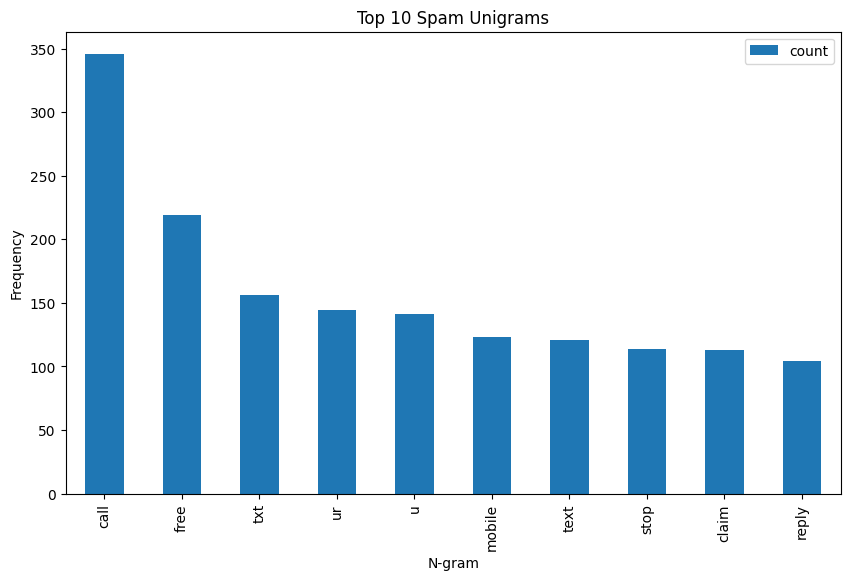

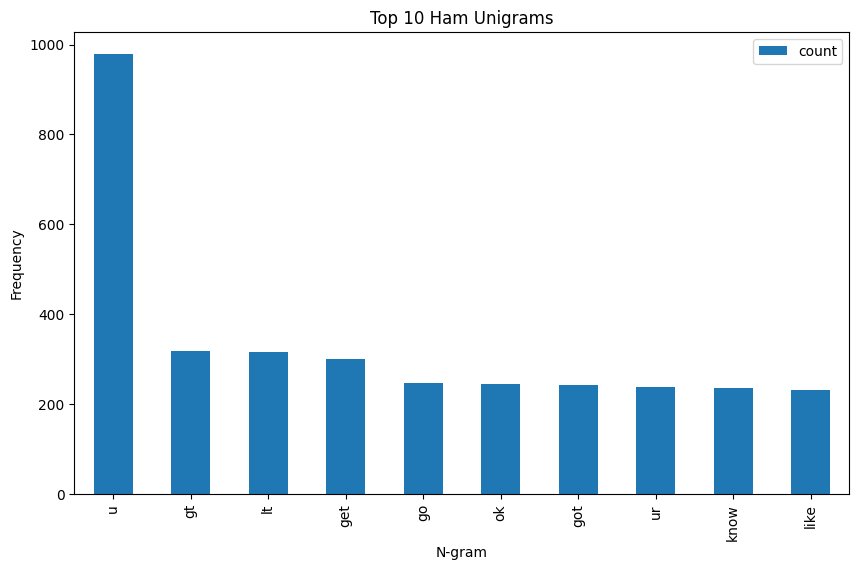

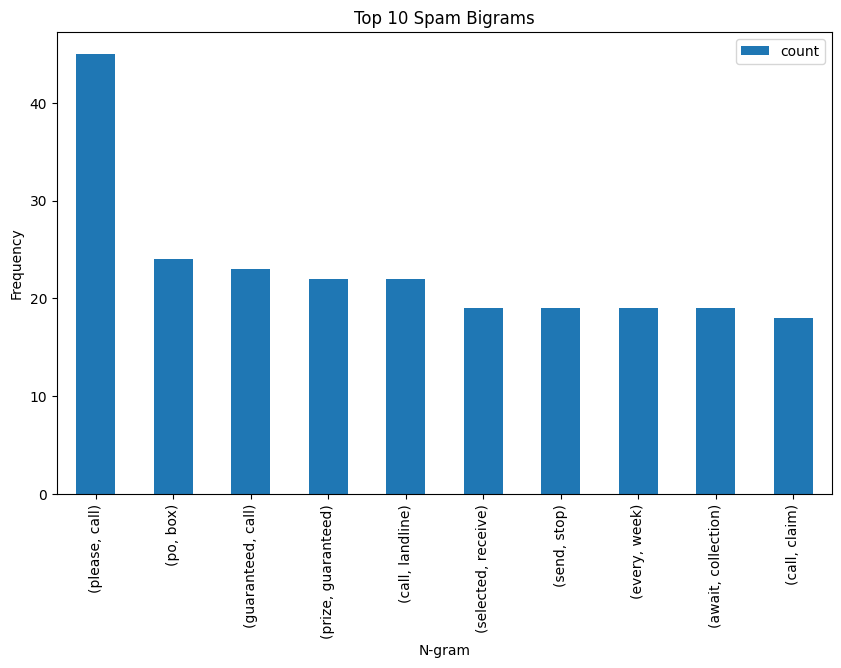

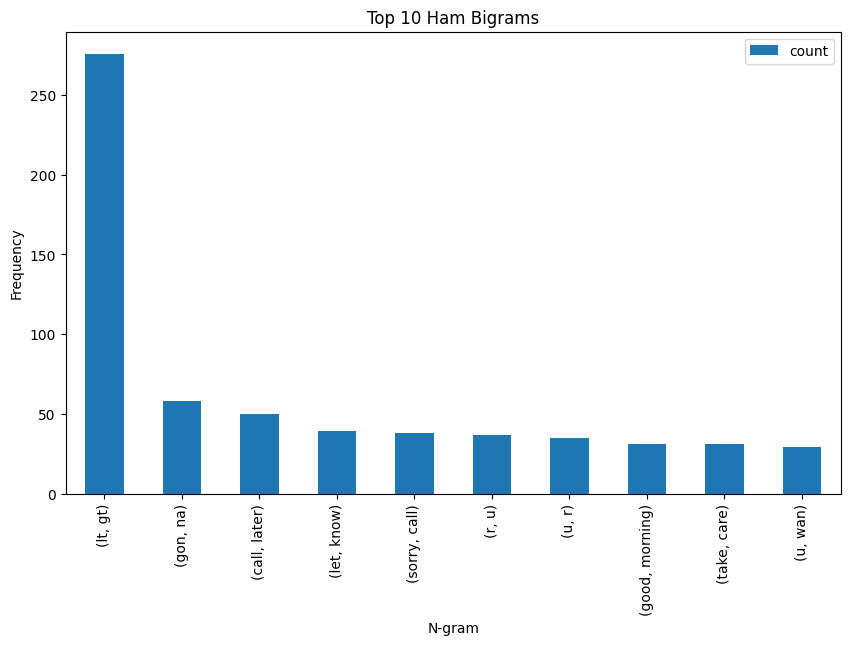

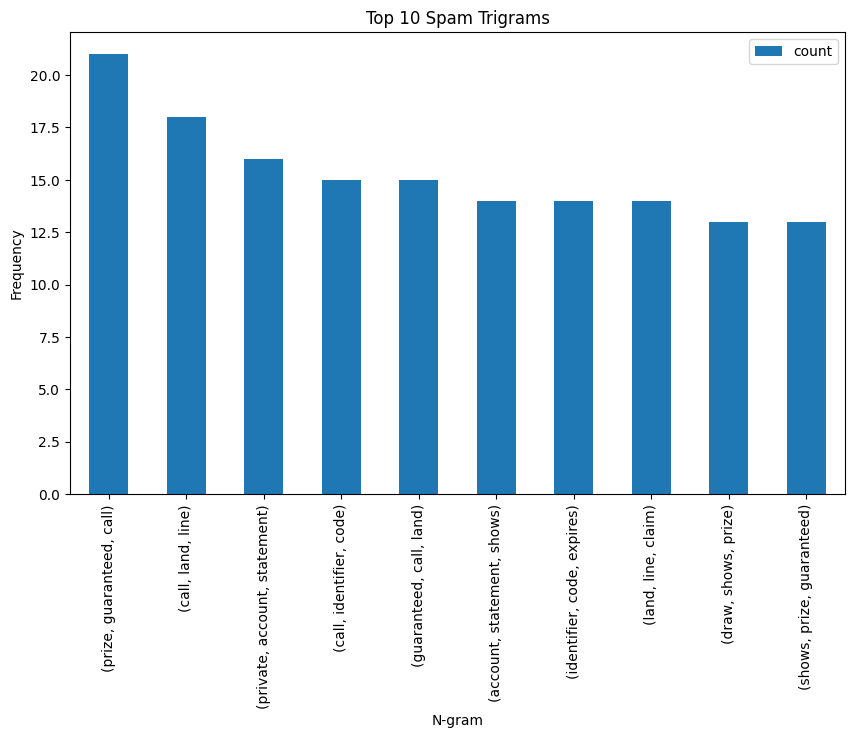

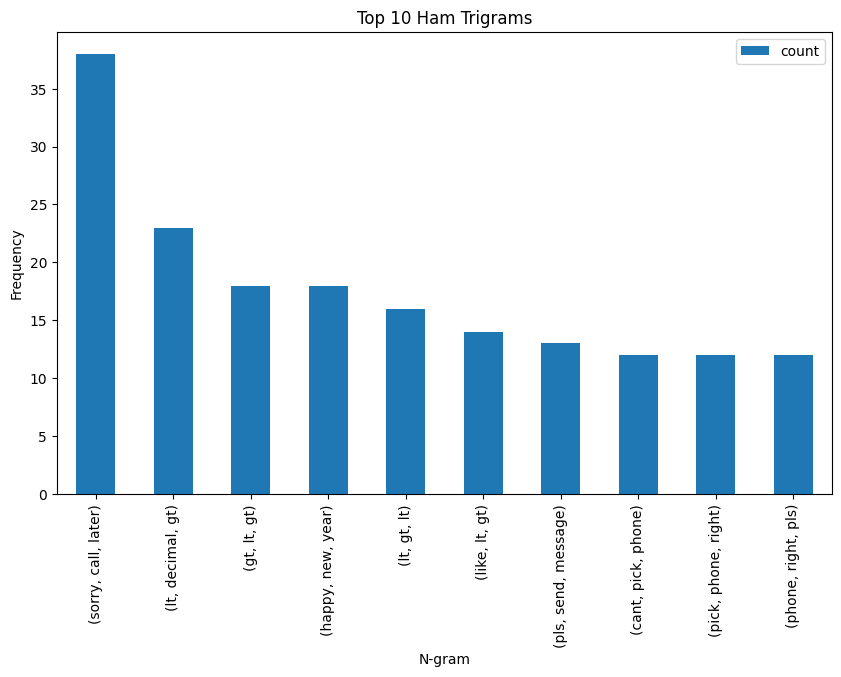

In [54]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('spam.csv', delimiter=',', encoding='latin1', header=None, names=['label', 'message'], usecols=[0, 1])

# Drop rows with missing values
df.dropna(inplace=True)

# Define NLTK stop words
stop_words = set(stopwords.words('english'))

# Preprocess text
def preprocess_text(text):
    # Remove email addresses, URLs, and HTML tags
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    
    # Convert to lower case
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords, punctuation, and numbers
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    return tokens

df['tokens'] = df['message'].apply(preprocess_text)

# Helper function to get the most frequent n-grams
def get_most_frequent_ngrams(tokens_list, n, top_n=10):
    ngrams_list = [ngrams(tokens, n) for tokens in tokens_list]
    flat_ngrams = [item for sublist in ngrams_list for item in sublist]
    ngrams_freq = Counter(flat_ngrams)
    return ngrams_freq.most_common(top_n)

# Separate tokens by class
spam_tokens = df[df['label'] == 'spam']['tokens']
ham_tokens = df[df['label'] == 'ham']['tokens']

# Most frequent words
# spam_words = Counter([word for tokens in spam_tokens for word in tokens])
# ham_words = Counter([word for tokens in ham_tokens for word in tokens])
# print("Most frequent words in spam:")
# print(spam_words.most_common(10))
# print("\nMost frequent words in ham:")
# print(ham_words.most_common(10))

# # Most frequent bigrams
# spam_bigrams = get_most_frequent_ngrams(spam_tokens, 2)
# ham_bigrams = get_most_frequent_ngrams(ham_tokens, 2)
# print("\nMost frequent bigrams in spam:")
# print(spam_bigrams)
# print("\nMost frequent bigrams in ham:")
# print(ham_bigrams)

# # Most frequent trigrams
# spam_trigrams = get_most_frequent_ngrams(spam_tokens, 3)
# ham_trigrams = get_most_frequent_ngrams(ham_tokens, 3)
# print("\nMost frequent trigrams in spam:")
# print(spam_trigrams)
# print("\nMost frequent trigrams in ham:")
# print(ham_trigrams)

# Generate WordClouds
def generate_wordcloud(tokens, title):
    text = ' '.join([' '.join(tokens) for tokens in tokens])
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(spam_tokens, 'Spam Wordcloud')
generate_wordcloud(ham_tokens, 'Ham Wordcloud')

# Vectorization
vectorizer_bow = CountVectorizer(stop_words='english')
X_bow = vectorizer_bow.fit_transform(df['message'])

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['message'])

df['cleaned_message'] = df['tokens'].apply(lambda x: ' '.join(x))
X_tfidf_preprocessed = tfidf_vectorizer.fit_transform(df['cleaned_message'])

feature_names_bow = vectorizer_bow.get_feature_names_out()
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

print("Feature names (Bag-of-Words):")
print(feature_names_bow)

print("\nFeature names (TF-IDF):")
print(feature_names_tfidf)

y = df['label'].map({'ham': 0, 'spam': 1}).fillna(0)

X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_tfidf_preprocessed, X_test_tfidf_preprocessed, _, _ = train_test_split(X_tfidf_preprocessed, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train_bow, y_train)
y_pred_bow = model.predict(X_test_bow)
f1_bow = f1_score(y_test, y_pred_bow)
print("F1 Score with Bag-of-Words:", f1_bow)

model.fit(X_train_tfidf, y_train)
y_pred_tfidf = model.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf)
print("F1 Score with TF-IDF:", f1_tfidf)

model.fit(X_train_tfidf_preprocessed, y_train)
y_pred_tfidf_preprocessed = model.predict(X_test_tfidf_preprocessed)
f1_tfidf_preprocessed = f1_score(y_test, y_pred_tfidf_preprocessed)
print("F1 Score with TF-IDF (with text preprocessing):", f1_tfidf_preprocessed)

print("\nF1 Scores of Different Methods:")
print(f"Bag-of-Words: {f1_bow}")
print(f"TF-IDF: {f1_tfidf}")
print(f"TF-IDF with text preprocessing: {f1_tfidf_preprocessed}")

# Determine which method has the highest F1 score
scores = {
    'Bag-of-Words': f1_bow,
    'TF-IDF': f1_tfidf,
    'TF-IDF with text preprocessing': f1_tfidf_preprocessed
}

best_method = max(scores, key=scores.get)
print(f"\nThe method with the highest F1 score is: {best_method} with a score of {scores[best_method]}")

# Plotting
def plot_ngrams(ngrams_list, title):
    df_ngrams = pd.DataFrame(ngrams_list, columns=['ngram', 'count'])
    df_ngrams.set_index('ngram', inplace=True)
    df_ngrams.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.xlabel('N-gram')
    plt.ylabel('Frequency')
    plt.show()

# Plot frequent words, bigrams, and trigrams for spam and ham
plot_ngrams(spam_words.most_common(10), 'Top 10 Spam Unigrams')
plot_ngrams(ham_words.most_common(10), 'Top 10 Ham Unigrams')

plot_ngrams(spam_bigrams, 'Top 10 Spam Bigrams')
plot_ngrams(ham_bigrams, 'Top 10 Ham Bigrams')

plot_ngrams(spam_trigrams, 'Top 10 Spam Trigrams')
plot_ngrams(ham_trigrams, 'Top 10 Ham Trigrams')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


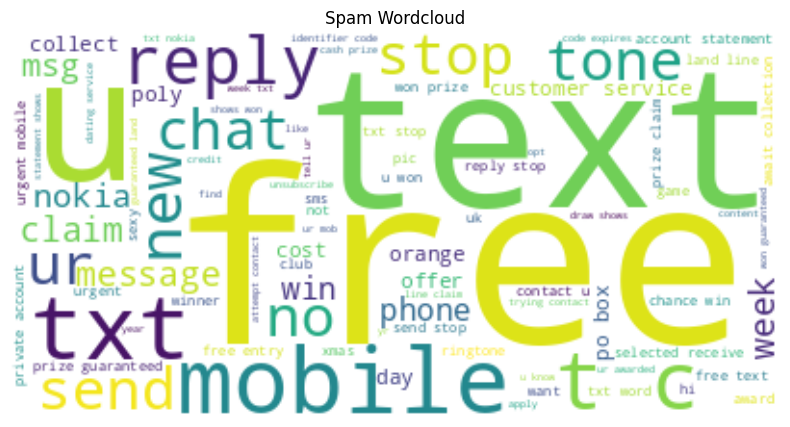

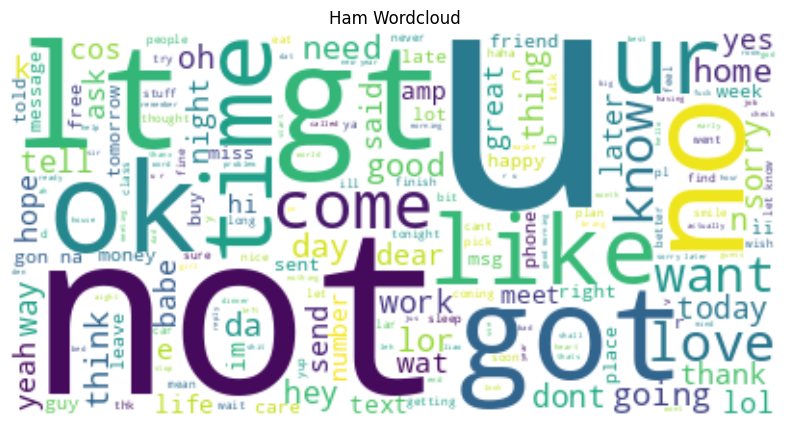

Feature names (Bag-of-Words):
['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']

Feature names (TF-IDF):
['aa' 'aah' 'aaniye' ... 'åôrents' 'ìä' 'ìï']


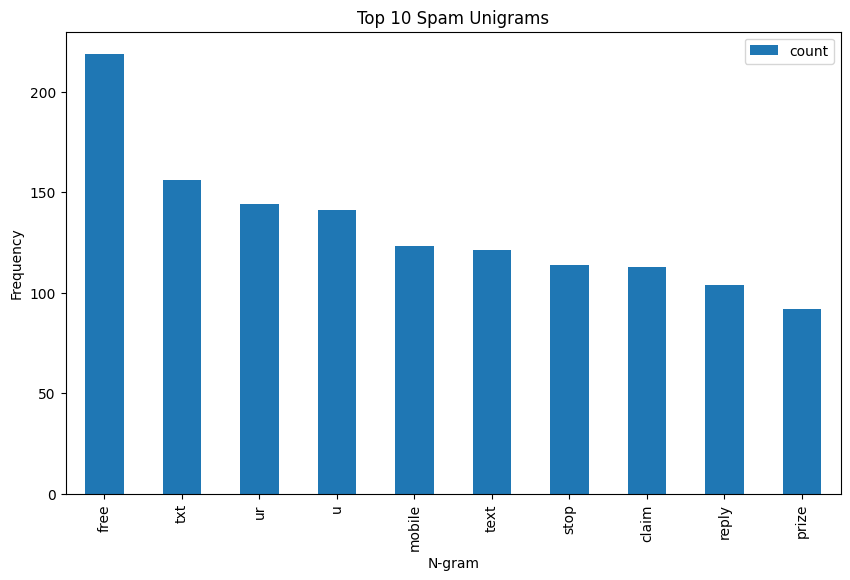

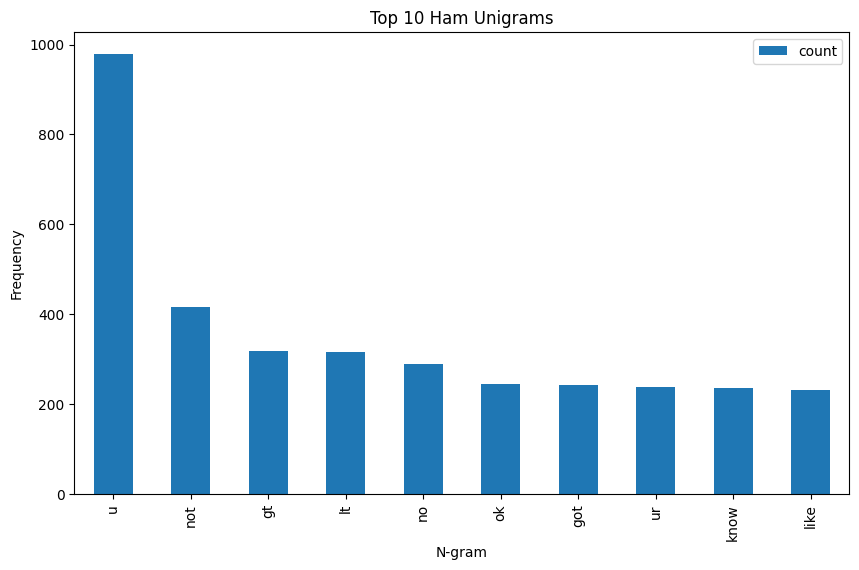

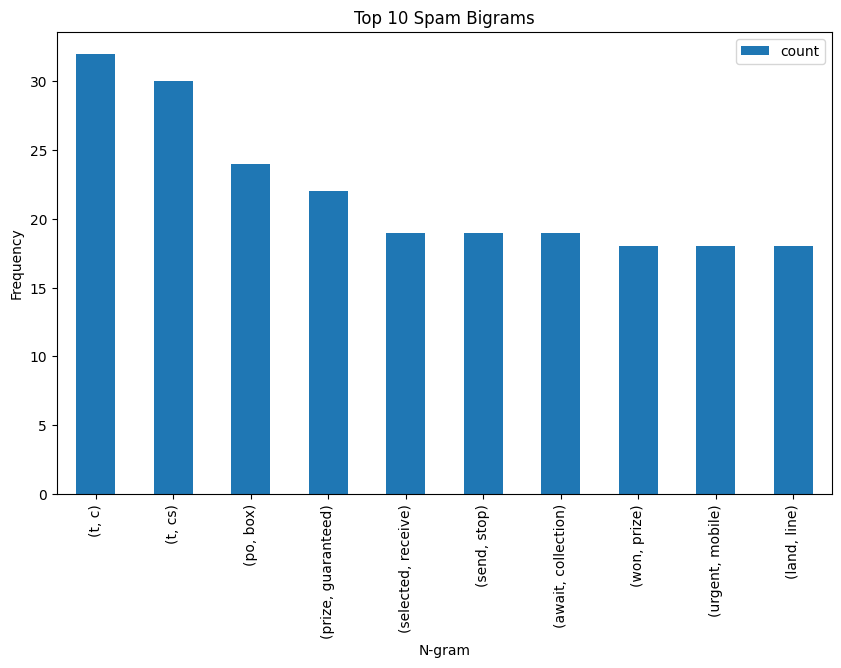

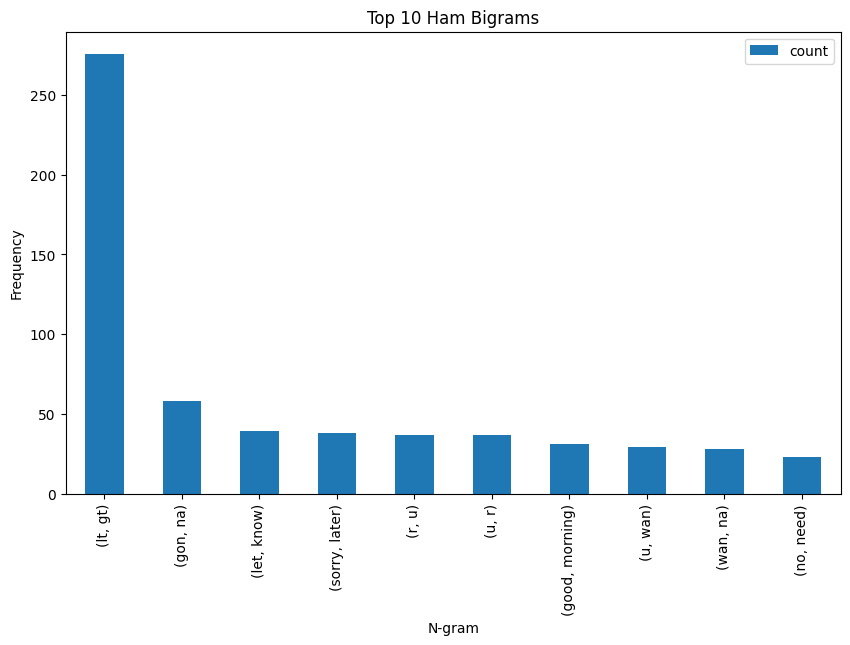

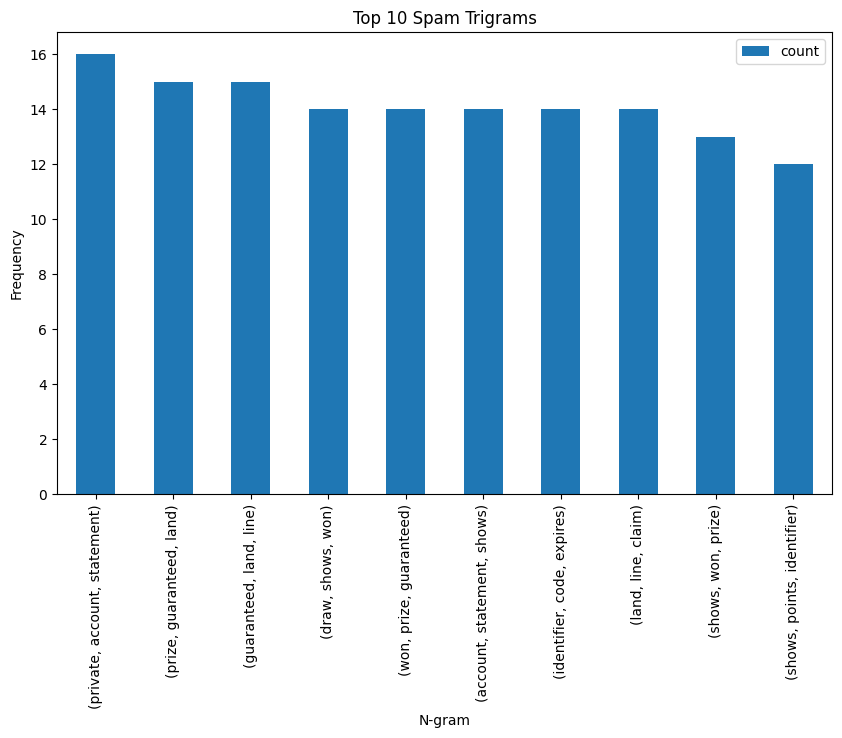

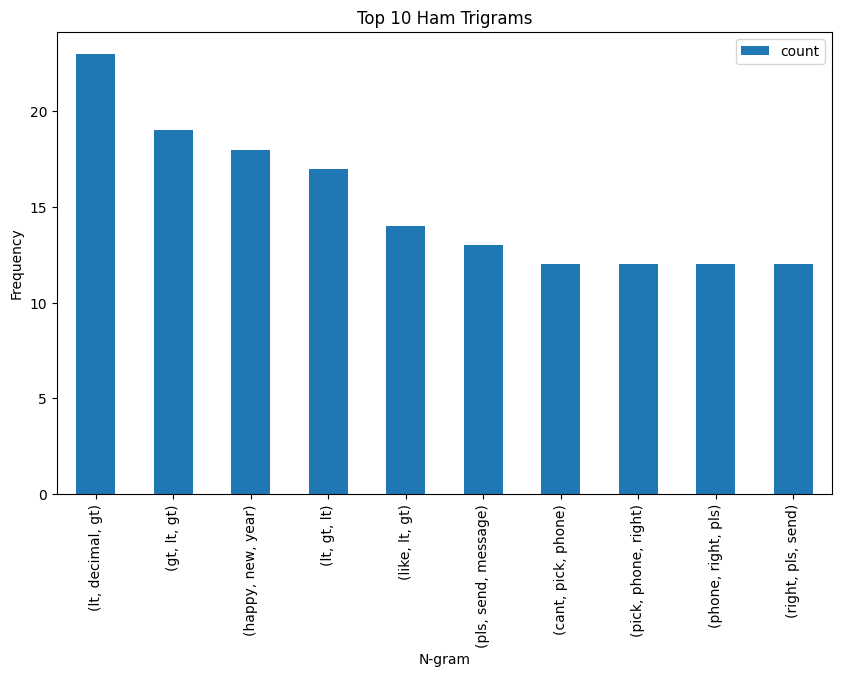

F1 Score with Bag-of-Words: 0.9214285714285714
F1 Score with TF-IDF: 0.7826086956521738
F1 Score with TF-IDF (with text preprocessing): 0.8062015503875969

The method with the highest F1 score is: Bag-of-Words with a score of 0.9214285714285714


In [61]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('spam.csv', delimiter=',', encoding='latin1', header=None, names=['label', 'message'], usecols=[0, 1])

# Drop rows with missing values
df.dropna(inplace=True)

# Define your custom stop words list
custom_stop_words = ['almost', 'between', 'been', 'before', 'whose', 'last', 'besides', 'ca', 'former', 'which', 'whereafter', 'behind', 
                     'one', 'much', 'ours', 'really', 'none', 'than', 'him', 'go', 'an', 'off', 'moreover', 'already', 'most', 
                     'across', 'has', 'mine', 'over', 'latter', 'mostly', 'thereupon', 'even', 'very', 'only', 'above', 'within', 'own', 
                     'hence', 'third', 'few', 'someone', 'nobody', 'my', 'amongst', 'formerly', 'seem', 'yet', 'when', 'name', 
                     'throughout', 'further', 'me', 'put', 'see', 'against', 'thru', 'could', 'nowhere', 'rather', 'for', 'there', 'of', 
                     'by', 'eight', 'becomes', 'herein', 'will', 'during', 'since', 'from', 'into', 'toward', 'made', 'at', 'with', 
                     'who', 'thus', 'well', 'somehow', 'always', 'beforehand', 'yourself', 'we', 'again', 'bottom', 
                     'just', 'after', 'various', 'other', 'anyone', 'around', 'on', 'afterwards', 'hers', 'everyone', 'although', 
                     'three', 'anyway', 'because', 'nine', 'anywhere', 'latterly', 'twenty', 'often', 'here', 'eleven',  
                     'alone', 'therefore', 'otherwise', 'something', 'next', 'using', 'less', 'therein', 'itself', 'too', 'hereafter', 
                     'this', 'what', 'whereupon', 'beside', 'every', 'move', 'whereas', 'full', 'whether', 'hereby', 
                     'in', 'do', 'once', 'used', 'due', 'their', 'whenever', 'top', 'fifty', 'had', 'were', 'among', 'under', 
                     'the', 'how', 'serious', 'whom', 'her', 'he', 'except', 'yourselves', 'empty', 'make', 'became', 'same', 
                     'call', 'thence', 'enough', 'any', 'anyhow', 'below', 'your', 'per', 'sometimes', 'fifteen', 'sixty', 'another', 'a', 
                     'his', 'say', 'also', 'must', 'elsewhere', 'as', 'anything', 'it', 'so', 'regarding', 'beyond', 'myself', 
                     'themselves', 'if', 'down', 'yours', 'that', 'have', 'becoming', 're', 'many', 'become', 'sometime', 'more', 'back', 
                     'forty', 'herself', 'did', 'perhaps', 'others', 'himself', 'wherein', 'namely', 'ever', 'give', 
                     'wherever', 'out', 'seems', 'onto', 'hereupon', 'seeming', 'might', 'everywhere', 'they', 'else', 'thereafter', 'where', 
                     'she', 'can', 'least', 'was', 'and', 'why', 'is', 'towards', 'whither', 'two', 'through', 'everything', 
                     'some', 'whence', 'part', 'four', 'side', 'such', 'twelve', 'still', 'take', 'these', 'done', 'those', 'however', 'ten', 
                     'are', 'amount', 'up', 'being', 'keep', 'while', 'doing', 'front', 'about', 'but', 'though', 
                     'you', "'re", 'indeed', 'five', 'them', 'please', 'would', 'whatever', 'whole', 'either', 'seemed', 
                     'show', 'our', 'somewhere', 'now', 'together', 'each', 'then', 'six', 'until', 'without', 'upon', 'am', 'along', 
                     'be', 'all', 'both', 'or', 'whereby', 'whoever', 'get', 'its', 'hundred', 
                     'should', 'may', 'meanwhile', 'first', 'does', 'quite', 'i', 'thereby', 'ourselves', 'to', 'unless', 'via', 'us', 'several']
# Preprocess text
def preprocess_text(text):
    # Remove email addresses, URLs, and HTML tags
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    
    # Convert to lower case
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords, punctuation, and numbers
    tokens = [word for word in tokens if word.isalpha() and word not in custom_stop_words]
    
    return tokens

df['tokens'] = df['message'].apply(preprocess_text)

# Helper function to get the most frequent n-grams
def get_most_frequent_ngrams(tokens_list, n, top_n=10):
    ngrams_list = [ngrams(tokens, n) for tokens in tokens_list]
    flat_ngrams = [item for sublist in ngrams_list for item in sublist]
    ngrams_freq = Counter(flat_ngrams)
    return ngrams_freq.most_common(top_n)

# Separate tokens by class
spam_tokens = df[df['label'] == 'spam']['tokens']
ham_tokens = df[df['label'] == 'ham']['tokens']

# Most frequent words
# spam_words = Counter([word for tokens in spam_tokens for word in tokens])
# ham_words = Counter([word for tokens in ham_tokens for word in tokens])
# print("Most frequent words in spam:")
# print(spam_words.most_common(10))
# print("\nMost frequent words in ham:")
# print(ham_words.most_common(10))

# # Most frequent bigrams
# spam_bigrams = get_most_frequent_ngrams(spam_tokens, 2)
# ham_bigrams = get_most_frequent_ngrams(ham_tokens, 2)
# print("\nMost frequent bigrams in spam:")
# print(spam_bigrams)
# print("\nMost frequent bigrams in ham:")
# print(ham_bigrams)

# # Most frequent trigrams
# spam_trigrams = get_most_frequent_ngrams(spam_tokens, 3)
# ham_trigrams = get_most_frequent_ngrams(ham_tokens, 3)
# print("\nMost frequent trigrams in spam:")
# print(spam_trigrams)
# print("\nMost frequent trigrams in ham:")
# print(ham_trigrams)

# Generate WordClouds
def generate_wordcloud(tokens, title):
    text = ' '.join([' '.join(tokens) for tokens in tokens])
    wordcloud = WordCloud(stopwords=set(custom_stop_words), background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(spam_tokens, 'Spam Wordcloud')
generate_wordcloud(ham_tokens, 'Ham Wordcloud')

# Vectorization
vectorizer_bow = CountVectorizer(stop_words='english')
X_bow = vectorizer_bow.fit_transform(df['message'])

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['message'])

df['cleaned_message'] = df['tokens'].apply(lambda x: ' '.join(x))
X_tfidf_preprocessed = tfidf_vectorizer.fit_transform(df['cleaned_message'])

feature_names_bow = vectorizer_bow.get_feature_names_out()
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

print("Feature names (Bag-of-Words):")
print(feature_names_bow)

print("\nFeature names (TF-IDF):")
print(feature_names_tfidf)

df['cleaned_message'] = df['tokens'].apply(lambda x: ' '.join(x))
X_tfidf_preprocessed = tfidf_vectorizer.fit_transform(df['cleaned_message'])

y = df['label'].map({'ham': 0, 'spam': 1}).fillna(0)

X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_tfidf_preprocessed, X_test_tfidf_preprocessed, _, _ = train_test_split(X_tfidf_preprocessed, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train_bow, y_train)
y_pred_bow = model.predict(X_test_bow)
f1_bow = f1_score(y_test, y_pred_bow)


model.fit(X_train_tfidf, y_train)
y_pred_tfidf = model.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test, y_pred_tfidf)


model.fit(X_train_tfidf_preprocessed, y_train)
y_pred_tfidf_preprocessed = model.predict(X_test_tfidf_preprocessed)
f1_tfidf_preprocessed = f1_score(y_test, y_pred_tfidf_preprocessed)



# Plotting
def plot_ngrams(ngrams_list, title):
    df_ngrams = pd.DataFrame(ngrams_list, columns=['ngram', 'count'])
    df_ngrams.set_index('ngram', inplace=True)
    df_ngrams.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.xlabel('N-gram')
    plt.ylabel('Frequency')
    plt.show()

# Plot frequent words, bigrams, and trigrams for spam and ham
plot_ngrams(spam_words.most_common(10), 'Top 10 Spam Unigrams')
plot_ngrams(ham_words.most_common(10), 'Top 10 Ham Unigrams')

plot_ngrams(spam_bigrams, 'Top 10 Spam Bigrams')
plot_ngrams(ham_bigrams, 'Top 10 Ham Bigrams')

plot_ngrams(spam_trigrams, 'Top 10 Spam Trigrams')
plot_ngrams(ham_trigrams, 'Top 10 Ham Trigrams')

print("F1 Score with Bag-of-Words:", f1_bow)
print("F1 Score with TF-IDF:", f1_tfidf)
print("F1 Score with TF-IDF (with text preprocessing):", f1_tfidf_preprocessed)

scores = {
    'Bag-of-Words': f1_bow,
    'TF-IDF': f1_tfidf,
    'TF-IDF with text preprocessing': f1_tfidf_preprocessed
}

best_method = max(scores, key=scores.get)
print(f"\nThe method with the highest F1 score is: {best_method} with a score of {scores[best_method]}")